In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
d=pd.read_csv("../Data/IQR_data.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
x = d.drop(columns=['City','Street','County','Airport_Code','Severity'])
y=d['Severity']


# Create a label encoder object
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in x.columns:
    # Compare if the dtype is object
    if x[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        x[col]=le.fit_transform(x[col])
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it
x = scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


* <h3> Find best parameters of Gradient Boosting Classifier using Grid Search </h3>

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20,30,40,50],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5,6,8,10]
}

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Initialize Grid Search
grid = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid.fit(x_train, y_train)
# Predict on the test set
y_pred = grid.predict(x_test)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
# Print the best score
print("Best score: ", grid.best_score_)  


Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
Best score:  0.8174448871069322


* <h3> Train model using best performing parameters

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.84      0.89      0.86     46363
           3       0.78      0.71      0.75     25107
           4       0.67      0.40      0.50      1410

    accuracy                           0.82     72906
   macro avg       0.57      0.50      0.53     72906
weighted avg       0.82      0.82      0.82     72906

Accuracy Score: 0.8192329849395111


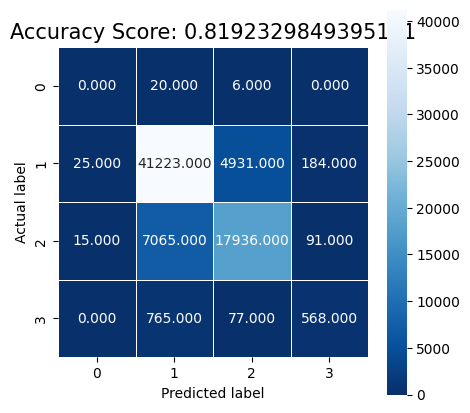

In [5]:
best_parameters = grid.best_params_
gb=GradientBoostingClassifier(n_estimators=best_parameters['n_estimators'],learning_rate=best_parameters['learning_rate'],max_depth=best_parameters['max_depth'])
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
plt.savefig('GB.png')
plt.show()

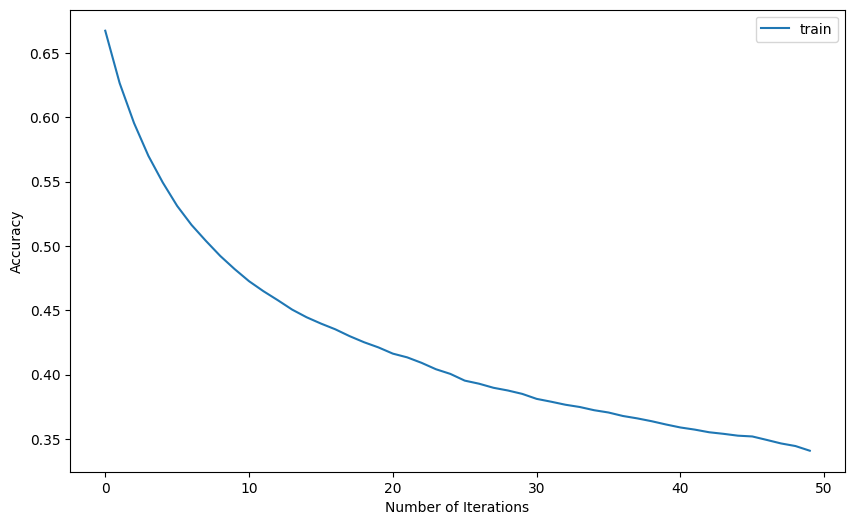

In [6]:
# Plot loss curve
plt.figure(figsize=(10,6))
plt.plot(gb.train_score_, label='train')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('GB_loss.png')
plt.show()